<a href="https://colab.research.google.com/github/shishir-py/deep-learning/blob/main/text_sentiment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/Project/sentiment analysis/database.sqlite"

In [ ]:
import sqlite3
conn=sqlite3.connect(path)

In [ ]:
import pandas as pd
data=pd.read_sql_query("SELECT * FROM tweets",conn)

In [ ]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [ ]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [ ]:
df=data[["text","airline_sentiment"]]

In [ ]:
df

,text,airline_sentiment
0,@JetBlue's new CEO seeks the right balance to ...,neutral
1,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,negative
2,@united yes. We waited in line for almost an h...,negative
3,@united the we got into the gate at IAH on tim...,negative
4,@SouthwestAir its cool that my bags take a bit...,negative
...,...,...
14480,@JetBlue I hope so because I fly very often an...,neutral
14481,@USAirways is a DM possible if you aren't foll...,neutral
14482,@JetBlue Yesterday on my way from EWR to FLL j...,positive
14483,@USAirways and when will one of these agents b...,negative


# Preprocessing the data : 

In [ ]:
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split



In [ ]:
def preprocess_text(text):
  #making the text to lowercase
  text=text.lower()
  #removing the url from the data in columns
  text = re.sub(r'http\S+', '', text)
  #removing the mention type from the data
  text = re.sub(r'http\S+', '', text)
  #tokenizing the words
  tokens=word_tokenize(text)
  #removing stopwords
  stop_words=set(stopwords.words('english'))
  filtered_token=[token for token in tokens if token not in stop_words and token.isalnum()]
  #Lemmantize the token
  lemmantizer=WordNetLemmatizer()
  '''lemintizes words are looks like dogs---->dog ,happiness--->happy'''
  lemmantized_words=[lemmantizer.lemmatize(token) for token in filtered_token]
  #join the token to make string
  preprocessed_text=''.join(lemmantized_words)
  return preprocessed_text


def convert_to_numeric(text):
  tokenizer = tf.keras.preprocessing.text.Tokenizer()
  tokenizer.fit_on_texts(data['text'])
  word_index = tokenizer.word_index
  sequences = tokenizer.texts_to_sequences(data['text'])
  padded_sequences = pad_sequences(sequences, maxlen=100)
  return padded_sequences

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
tu=preprocess_text("@JetBlue is REALLY getting on my nerves !! 😡😡")
print(tu)

jetbluereallygettingnerve


In [ ]:
convert_to_numeric(tu)

array([[    0,     0,     0, ...,    32,    33,  6586],
       [    0,     0,     0, ...,  6587,  3756,  1473],
       [    0,     0,     0, ...,   127,   490,  3166],
       ...,
       [    0,     0,     0, ...,    32,    33, 15768],
       [    0,     0,     0, ...,   328,     1,   387],
       [    0,     0,     0, ...,    66,   316,   121]], dtype=int32)

In [ ]:
df['text']=df['text'].apply(preprocess_text)

<ipython-input-19-819a0c29f8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text']=df['text'].apply(preprocess_text)


In [ ]:
df

,text,airline_sentiment
0,jetbluenewceoseekrightbalancepleasepassengerwa...,neutral
1,jetbluereallygettingnervenothappy,negative
2,unitedyeswaitedlinealmosthourpassengerleftwant...,negative
3,unitedgotgateiahtimegivenseatclosedflightknowp...,negative
4,southwestaircoolbagtakebitlongerdontgivebaggag...,negative
...,...,...
14480,jetbluehopeflyoftenwouldhatechangeairline,neutral
14481,usairwaysdmpossiblefollowing,neutral
14482,jetblueyesterdaywayewrfllwheelsupjetbluesofly,positive
14483,usairwaysoneagentavailablespeak,negative


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Using the Linear Regression method ♒

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer


#splitting the data
train_data,test_data,train_labels,test_labels=train_test_split(df['text'],df['airline_sentiment'],test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
train_data_counts = vectorizer.fit_transform(train_data)
test_data_counts = vectorizer.transform(test_data)



vec =TfidfTransformer()
train_vec=vec.fit_transform(train_data_counts)
test_vec=vec.transform(test_data_counts)

model=LogisticRegression(max_iter=10000)
model.fit(train_vec,train_labels)


LogisticRegression(max_iter=10000)

In [ ]:
# Evaluate the model on the test set
accuracy = model.score(test_vec, test_labels)
print(f'Test accuracy: {accuracy:.4f}')

Test accuracy: 0.6282


# Using Deep Learning ⚛


# Using Pretrained model BERT⚫

In [ ]:
#we need transformer 
!pip install transformers
#

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.2/224.2 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 115.2 MB/s eta 0:00:00


In [ ]:
import torch
from transformers import TFBertForSequenceClassification,BertTokenizer,AdamW,get_linear_schedule_with_warmup,AutoModel,AutoTokenizer,BertModel


In [ ]:
train_data, val_data = train_test_split(df, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encoding=tokenizer(list(train_data['text']),truncation=True,padding=True)
valid_encoding=tokenizer(list(val_data['text']),truncation=True,padding=True)

sentiment_dict = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')
valid_labels = val_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')

In [ ]:
print(len(train_labels))
print(len(valid_labels))
print(len(train_encoding))
print(len(valid_encoding))




11588
2897
3
3


In [ ]:
# Split the data into training and validation sets

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encoding), train_labels)).shuffle(len(train_labels)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encoding), valid_labels)).batch(32)

# Load the pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Fine-tune the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)



All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
363/363 [==============================] - 223s 395ms/step - loss: 0.7513 - accuracy: 0.6863 - val_loss: 0.6701 - val_accuracy: 0.7242
Epoch 2/10
363/363 [==============================] - 128s 353ms/step - loss: 0.5898 - accuracy: 0.7614 - val_loss: 0.6186 - val_accuracy: 0.7421
Epoch 3/10
363/363 [==============================] - 122s 336ms/step - loss: 0.4623 - accuracy: 0.8173 - val_loss: 0.6867 - val_accuracy: 0.7487
Epoch 4/10
363/363 [==============================] - 121s 333ms/step - loss: 0.3450 - accuracy: 0.8719 - val_loss: 0.8267 - val_accuracy: 0.7411
Epoch 5/10
363/363 [==============================] - 122s 335ms/step - loss: 0.2398 - accuracy: 0.9158 - val_loss: 0.8398 - val_accuracy: 0.7384
Epoch 6/10
363/363 [==============================] - 120s 332ms/step - loss: 0.1694 - accuracy: 0.9420 - val_loss: 0.9614 - val_accuracy: 0.7373
Epoch 7/10
363/363 [==============================] - 121s 333ms/step - loss: 0.1152 - accuracy: 0.9615 - val_loss: 1.1385 -

# Balanced datasets : 

In [ ]:
df['airline_sentiment'].value_counts()

negative    9082
neutral     3069
positive    2334
Name: airline_sentiment, dtype: int64

<Axes: xlabel='airline_sentiment', ylabel='count'>

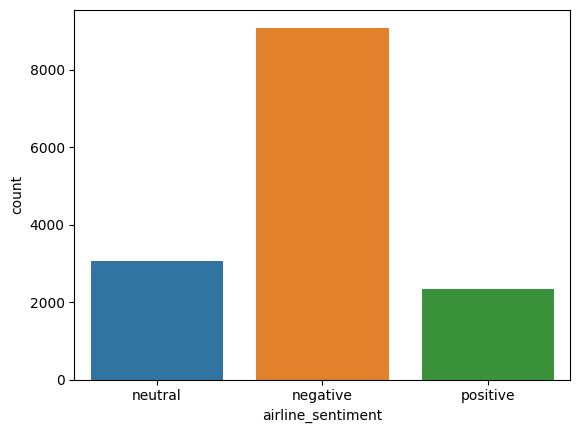

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='airline_sentiment')


**It shows that the dataset is highly imbalanced by negative sentiment**

In [ ]:
df_new=df.drop(df[df.airline_sentiment == 'negative'].iloc[:6000].index)

<Axes: xlabel='airline_sentiment', ylabel='count'>

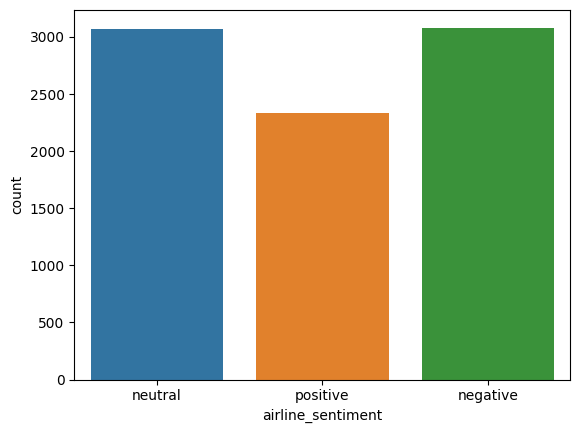

In [ ]:
sns.countplot(data=df_new, x='airline_sentiment')


**After Dropping the 6000 data of negative sentiment the datasets seems to be balance**

In [ ]:
df_new['text']=df_new['text'].apply(preprocess_text)

In [ ]:
train_data, test_data = train_test_split(df_new, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_encoding=tokenizer(list(train_data['text']),truncation=True,padding=True)
test_encoding=tokenizer(list(test_data['text']),truncation=True,padding=True)

sentiment_dict = {'positive': 0, 'negative': 1, 'neutral': 2}
train_labels = train_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')
test_labels = test_data['airline_sentiment'].map(sentiment_dict).values.astype('int64')

In [ ]:
print(len(train_labels))
print(len(test_labels))
print(len(train_encoding))
print(len(test_encoding))

6788
1697
3
3


In [ ]:

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encoding), train_labels)).shuffle(len(train_labels)).batch(32)
val_dataset = tf.data.Dataset.from_tensor_slices((dict(valid_encoding), valid_labels)).batch(32)

# Load the pre-trained BERT model for sequence classification
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Fine-tune the model
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset)



All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
213/213 [==============================] - 156s 413ms/step - loss: 0.9253 - accuracy: 0.5641 - val_loss: 0.8889 - val_accuracy: 0.6006
Epoch 2/10
213/213 [==============================] - 76s 358ms/step - loss: 0.7337 - accuracy: 0.6912 - val_loss: 0.7965 - val_accuracy: 0.6310
Epoch 3/10
213/213 [==============================] - 72s 337ms/step - loss: 0.5799 - accuracy: 0.7702 - val_loss: 0.5232 - val_accuracy: 0.7856
Epoch 4/10
213/213 [==============================] - 73s 343ms/step - loss: 0.4252 - accuracy: 0.8400 - val_loss: 0.6603 - val_accuracy: 0.7304
Epoch 5/10
213/213 [==============================] - 72s 338ms/step - loss: 0.3045 - accuracy: 0.8933 - val_loss: 0.6489 - val_accuracy: 0.8043
Epoch 6/10
213/213 [==============================] - 71s 335ms/step - loss: 0.2216 - accuracy: 0.9228 - val_loss: 0.5919 - val_accuracy: 0.8322
Epoch 7/10
213/213 [==============================] - 71s 332ms/step - loss: 0.1626 - accuracy: 0.9464 - val_loss: 0.8362 - val_a